# Project 11-- Anthony Micco

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [3]:
options(jupyter.rich_display=F)

In [4]:
options(repr.matrix.max.cols=30,repr.matrix.max.rows=200)

In [5]:
library(data.table)

In [6]:
orders<-fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [7]:
orders$created_at<-format(orders$created_at, "%m-%d-%y")

In [8]:
head(orders$created_at)

[1] "08-01-19" "08-01-19" "08-01-19" "08-01-19" "08-01-19" "08-01-19"

In [9]:
orders<-fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [10]:
sort(table(year(orders$created_at)),decreasing=TRUE)


 2019  2020 
93795 41508 

In [11]:
table(wday(orders$created_at))


    1     2     3     4     5     6     7 
18651 19676 22003 20619 22210 15906 16238 

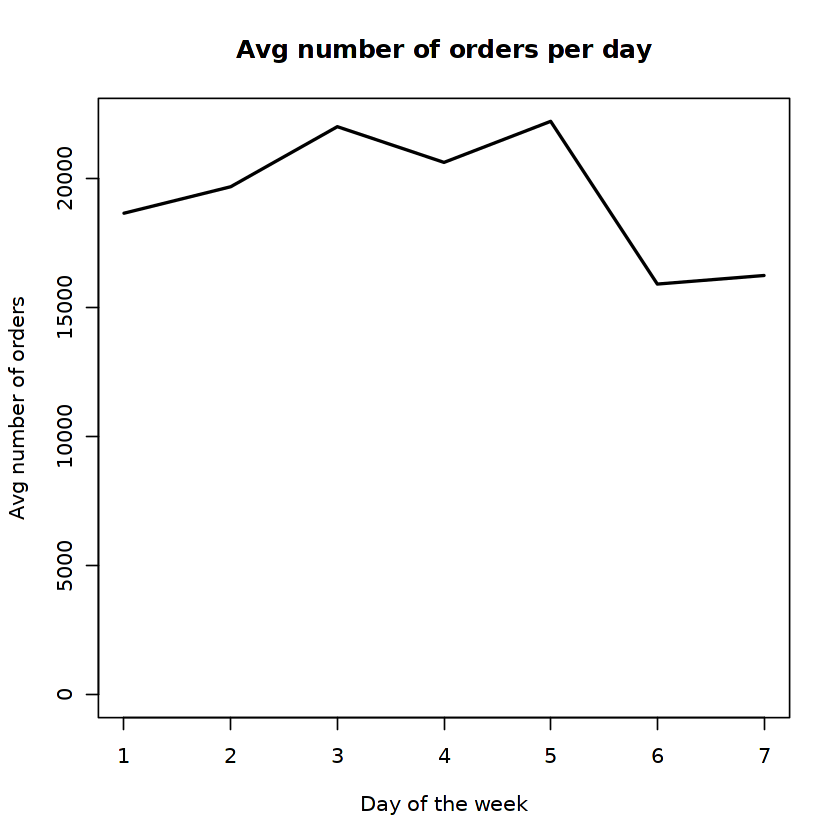

In [12]:
plot(table(wday(orders$created_at)),type="l", xlab="Day of the week",ylab="Avg number of orders", main="Avg number of orders per day") 

B) There are two unique years in the data frame, 2019 and 2020. 

D) One thing I noticed about the data is that there were more orders placed during the week than during the weekend. This kinda surprised me because I figured people would be ordering food more on the weekend than during the work week, but the data disproves that. 

## Question 2

In [13]:
head(orders$vendor_id[year(orders$created_at)==2019])

[1] 105 294  83  90  83  83

In [14]:
head(orders$vendor_id[year(orders$created_at)==2020])

[1]  82 189 578  79 113 537

In [90]:
tapply(orders$vendor_id, year(orders$created_at), function(x){head(sort(table(x),decreasing=TRUE))})

$`2019`
x
 113   78  105   83   79   84 
5935 4643 4513 3639 3193 2860 

$`2020`
x
 846   84   79  113  386  849 
2556 2141 1924 1872 1160 1067 


In [91]:
df19<-subset(orders, year(created_at)==2019)
df20<-subset(orders, year(created_at)==2020)

In [103]:
tapply(df19$grand_total, df19$vendor_id,function(x){head(sort(sum(x),decreasing=TRUE))})

      4      13      20      23      28      33      43      44      55      66 
27006.3 10214.1 30206.5 16241.1 14993.6 32419.8 10535.4 11684.7 10218.5 11304.7 
     67      75      76      78      79      81      82      83      84      85 
 6641.8 16134.0  7007.8 60064.2 38312.9 14815.9  7619.6 65054.2 45207.1 21834.9 
     86      90      92     104     105     106     110     113     115     134 
17626.9 18587.1 42936.6 22747.3 60609.1 29495.8 36053.2 85889.7  6449.7 28492.3 
    145     148     149     154     157     159     160     161     176     180 
 8118.4  9554.6  5288.1 10754.5 16768.0 36847.6  5418.1 12745.5 10350.6 12170.7 
    188     189     191     192     193     195     196     197     199     201 
17688.2 13951.9  8963.6 34963.0 14836.5 17238.2  4470.5  7702.7  4778.3 13721.6 
    203     207     216     221     225     231     237     243     250     259 
 7144.3  6428.0  6555.8 12580.1  9180.2  7719.2  9473.1 14246.4  4353.2 13533.8 
    265     271     274     

In [102]:
tapply(df20$grand_total, df20$vendor_id,function(x){head(sort(sum(x),decreasing=TRUE))})

      4      13      20      23      28      33      43      44      55      66 
 7934.2  2872.4  6831.7  5104.6  4891.6  9996.7  3549.6  4538.4  3037.5   412.5 
     67      75      76      79      81      82      83      84      85      86 
 5380.1  4705.1  2237.6 27050.2   775.4  6514.0   665.1 38046.3   576.1  9693.2 
     90      92     104     105     106     110     113     115     134     145 
 4945.4  9455.9  6882.6 15254.5  6023.8  7107.5 28476.4   852.1  7841.2  2085.1 
    148     149     154     157     159     160     161     176     180     188 
 4626.9  1120.0  2897.6  4350.7 10156.3  4892.1    25.0  5818.3    35.3 11316.8 
    189     191     192     193     195     197     199     201     203     207 
 7919.4  6554.9  2583.6    35.6  1487.9  4098.3  2332.4  1975.7  1007.6  2499.3 
    216     221     225     237     250     259     265     271     274     288 
 4583.3   217.8  3398.7  5682.9  1796.3  5245.6   441.1  6415.0   720.3  8786.8 
    289     294     295     

B)The grand totals for the top vendors in 2019 were: 
113: 85889.7
78: 60064.2
105: 60609.1 
83: 65054.2
79: 38312.9
84: 45207.1

The grand totals for the top vendors in 2020 were:
846: 30484.9
84: 38046.3 
79: 27050.2
113: 28476.4 
386: 14379.1
849: 12252.4 


C) I noticed that most of the vendors had a smaller grand total in 2020 than they did in 2019. For example, in 2019,the vendor with ID of 79 had a grand total of 38312.9, while in 2020, they had a grand total of 27050.2. That was the case with many of these vendors and it probably had something to do with COVID-19 shutting down most of the world during 2020.  

## Question 3

In [20]:
head(orders$created_at)

[1] "2019-08-01 05:30:16 UTC" "2019-08-01 05:31:10 UTC"
[3] "2019-08-01 05:31:33 UTC" "2019-08-01 05:34:54 UTC"
[5] "2019-08-01 05:35:51 UTC" "2019-08-01 05:37:05 UTC"

In [21]:
hour(head(orders$created_at))

[1] 5 5 5 5 5 5

In [22]:
tail(orders$created_at)

[1] "2020-02-29 23:45:58 UTC" "2020-02-29 23:47:59 UTC"
[3] "2020-02-29 23:48:37 UTC" "2020-02-29 23:48:43 UTC"
[5] "2020-02-29 23:50:10 UTC" "2020-02-29 23:52:14 UTC"

In [23]:
hour(tail(orders$created_at))

[1] 23 23 23 23 23 23

In [24]:
sum(sort(table(hour(orders$created_at[(hour(orders$created_at)>17)])),decreasing=TRUE))

[1] 69791

In [25]:
sum(sort(table(hour(orders$created_at[(hour(orders$created_at)<17)])),decreasing=TRUE))

[1] 60521

In [26]:
beforeFive<-table(wday(orders$created_at[hour(orders$created_at)<17]))
afterFive<-table(wday(orders$created_at[hour(orders$created_at)>17]))

In [27]:
myDF<-data.frame(group=c(rep("Before Five",times=7),rep("After Five",times=7)),TotalOrders=c(beforeFive,afterFive),DaysOfWeek=c(1:7,1:7))

In [28]:
library(ggplot2)

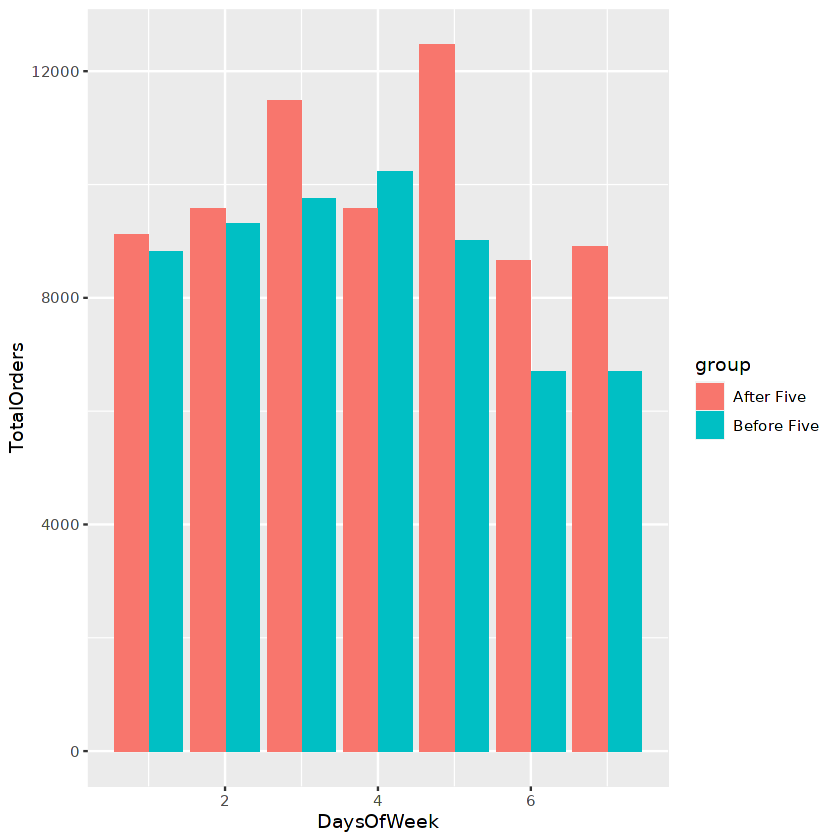

In [29]:
ggplot(myDF, aes(DaysOfWeek, TotalOrders, fill=group)) + geom_col(position = "dodge")

A) There are 69791 orders placed after 5 pm and 60521 orders placed before 5 pm. 

## Question 4

In [30]:
head(orders)

  akeed_order_id customer_id item_count grand_total payment_mode promo_code
1 163238         92PEE24     1           7.6        2                      
2 163240         QS68UD8     1           8.7        1                      
3 163241         MB7VY5F     2          14.4        1                      
4 163244         KDJ951Y     1           7.1        1                      
5 163245         BAL0RVT     4          27.2        1                      
6 163246         U263OCD     3          18.2        2                      
  vendor_discount_amount promo_code_discount_percentage is_favorite is_rated
1 0                      NA                                         No      
2 0                      NA                                         No      
3 0                      NA                                         No      
4 0                      NA                                         No      
5 0                      NA                                         No      
6 0   

In [31]:
itemTotal<-tapply(orders$grand_total, orders$item_count, sum)

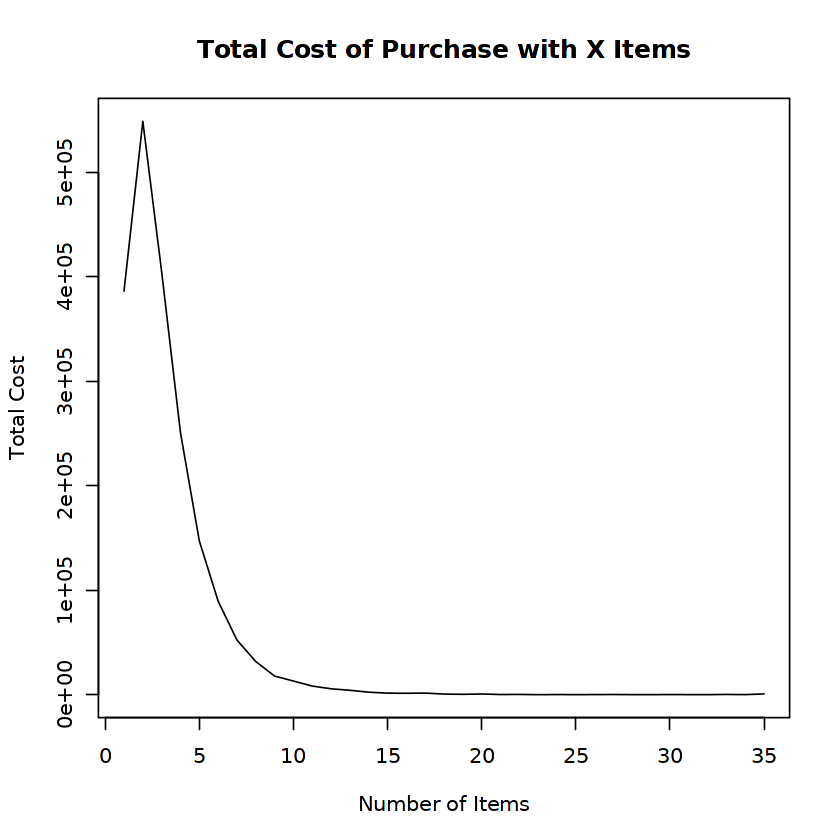

In [59]:
plot(itemTotal,type="l",xlab="Number of Items",ylab="Total Cost", main="Total Cost of Purchase with X Items")  

In [33]:
tapply(year(orders$created_at), orders$payment_mode, table)

$`1`

 2019  2020 
71967 32747 

$`2`

 2019  2020 
16345  5734 

$`3`

2019 2020 
 849  512 

$`4`

2019 2020 
4337 2359 

$`5`

2019 2020 
 297  156 


In [34]:
pay19<-table(orders$payment_mode[year(orders$created_at)==2019])
pay20<-table(orders$payment_mode[year(orders$created_at)==2020])

In [35]:
paymentDF<-myDF<-data.frame(group=c(rep("2019",times=5),rep("2020",times=5)),TotalOrders=c(pay19,pay20),PaymentMethod=c(1:5,1:5))

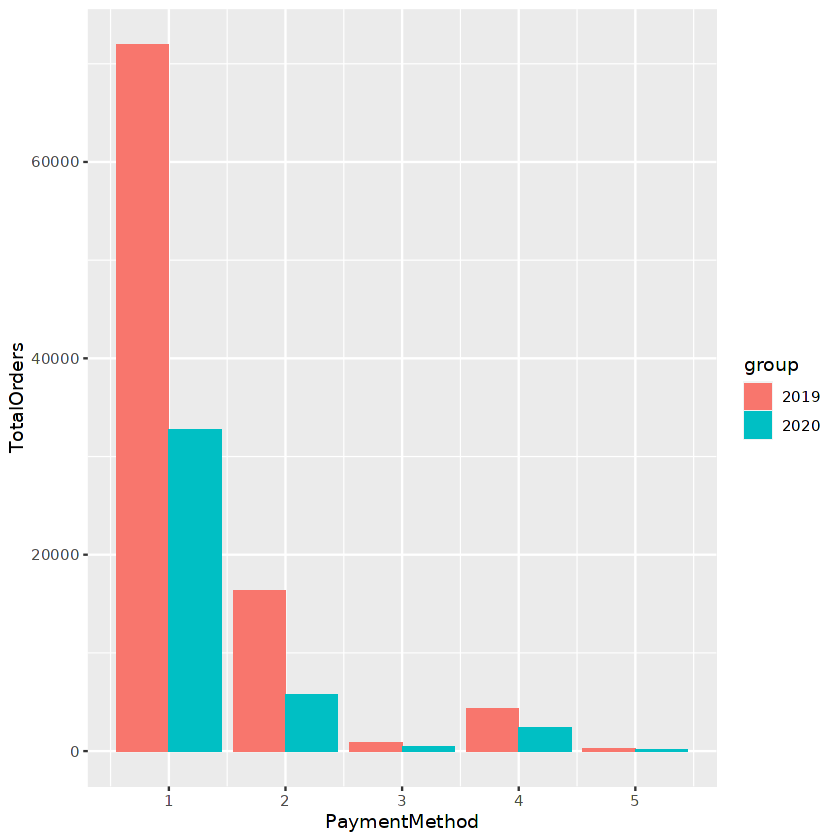

In [36]:
ggplot(paymentDF, aes(PaymentMethod, TotalOrders, fill=group)) + geom_col(position = "dodge")

In [54]:
totalOrdersPerMonth<-tapply(orders$vendor_id, month(orders$created_at),sum)

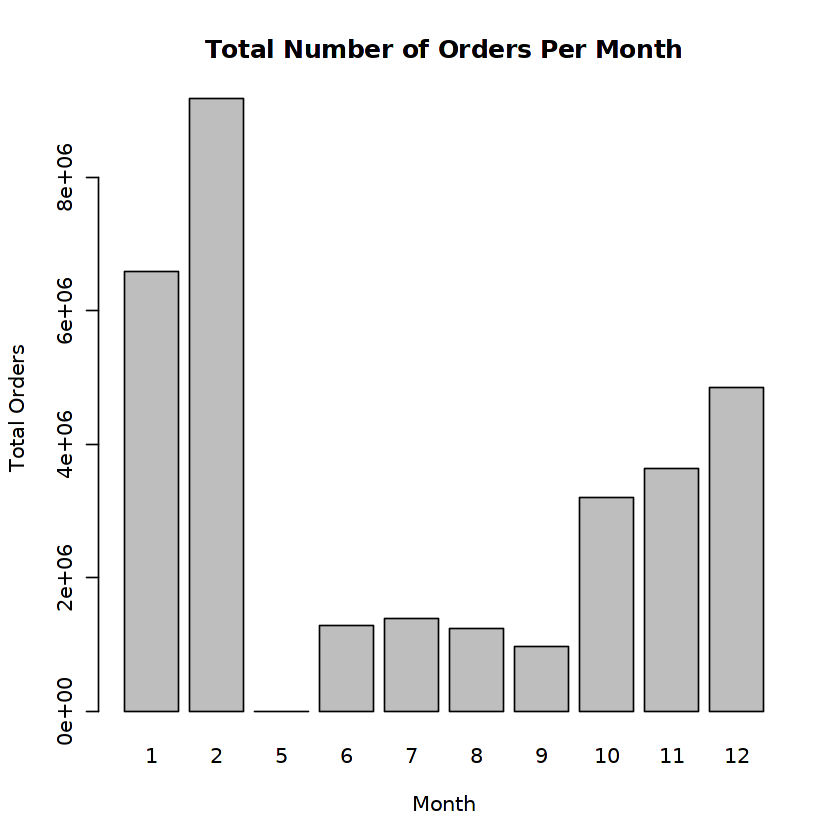

In [57]:
barplot(totalOrdersPerMonth,xlab="Month", ylab="Total Orders", main="Total Number of Orders Per Month")

A) For the first plot, I used to a line graph to depict the grand total of the number of items in each order placed in the data frame. I thought it would be interesting to see the total amount of money people spent on varying numbers of items. As expected, most people had orders with fewer items, so the highest totals were spent on orders with 12 or fewer items, with the most money being spent on orders with 2 items.      


B) For the second plot, I used ggplot2 bar graph to show the difference between the amount of times the different payment methods were used in the years 2019 and 2020. I was interested in seeing how many different payment methods were used and also wanted to continue working with the ggplot2 library so I figured I could compare the two years given in the data frame. Through the plot, I found that most of the orders were paid for were methods 1 and 2 which I assume would be cash and card. 


C)For my last plot, I used a bar plot to depict the total number of orders per month in the data frame. I was curious to discover when people bought the most orders. Through the plot, I learned that most orders were placed in January and February, while the fewest orders were placed during the summer months of June, July and August.  

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.